In [1]:
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X,y = make_circles(n_samples=1000, noise=0.08)

In [3]:
X

array([[ 0.07463919, -0.72277122],
       [-0.4672362 , -0.53556201],
       [-0.90650316, -0.27232645],
       ...,
       [-0.87830739,  0.27497932],
       [-0.03129913,  0.67716275],
       [-0.7475991 , -0.4758712 ]])

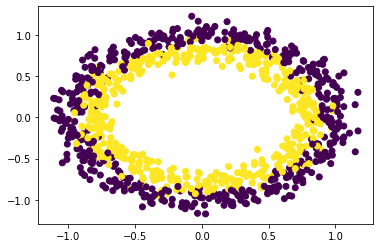

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
df = pd.DataFrame(columns=['X1','X2'], data=X)

In [6]:
df['class'] = y

In [7]:
df

,X1,X2,class
0,0.074639,-0.722771,1
1,-0.467236,-0.535562,1
2,-0.906503,-0.272326,0
3,0.228981,0.800830,1
4,0.065746,-0.723238,1
...,...,...,...
995,-0.755213,0.424473,1
996,-0.537371,-0.737219,0
997,-0.878307,0.274979,1
998,-0.031299,0.677163,1


In [8]:
X =df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [21]:
X

array([[ 0.07463919, -0.72277122],
       [-0.4672362 , -0.53556201],
       [-0.90650316, -0.27232645],
       ...,
       [-0.87830739,  0.27497932],
       [-0.03129913,  0.67716275],
       [-0.7475991 , -0.4758712 ]])

In [ ]:
y

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop,Adagrad

In [30]:
# Initializing the Model
def Model_Init():
  model = Sequential()

  model.add(Dense(4, activation='relu',input_dim=2))
  model.add(BatchNormalization())
  model.add(Dense(4, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model

In [32]:
# ADAGrad Optimizer
model = Model_Init()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 batch_normalization_8 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_9 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 69
Trainable params: 53
Non-trainable pa

In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adagrad',metrics=['accuracy'])

In [34]:
logs_with_adagrad = model.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 0.8808 - accuracy: 0.5344 - val_loss: 0.7015 - val_accuracy: 0.4750
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.5422 - val_loss: 0.7048 - val_accuracy: 0.4563
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8389 - accuracy: 0.5422 - val_loss: 0.7082 - val_accuracy: 0.4500
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8427 - accuracy: 0.5406 - val_loss: 0.7120 - val_accuracy: 0.4563
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.5656 - val_loss: 0.7163 - val_accuracy: 0.4375
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.8197 - accuracy: 0.5500 - val_loss: 0.7212 - val_accuracy: 0.4313
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.8242 - accuracy: 0.5422 - val_loss: 0.7267 - val_accuracy: 0.4250
Epoch 8/200


In [35]:
# Model with RMSProp as Optimizer
model = Model_Init()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 12        
                                                                 
 batch_normalization_10 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_11 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 69
Trainable params: 53
Non-trainable pa

In [36]:
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [37]:
logs_with_RMSprop = model.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 1.0016 - accuracy: 0.4828 - val_loss: 0.6941 - val_accuracy: 0.4750
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.9383 - accuracy: 0.4891 - val_loss: 0.6971 - val_accuracy: 0.4750
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8729 - accuracy: 0.4969 - val_loss: 0.7003 - val_accuracy: 0.4125
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8411 - accuracy: 0.4875 - val_loss: 0.7000 - val_accuracy: 0.4375
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7972 - accuracy: 0.4922 - val_loss: 0.7001 - val_accuracy: 0.4437
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.5031 - val_loss: 0.6994 - val_accuracy: 0.4563
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7519 - accuracy: 0.4922 - val_loss: 0.6975 - val_accuracy: 0.4688
Epoch 8/200


In [43]:
# Model with Adam as Optimizer
model = Model_Init()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 4)                 12        
                                                                 
 batch_normalization_12 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_13 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 69
Trainable params: 53
Non-trainable pa

In [44]:
model.compile(optimizer='Adam',metrics=['accuracy'], loss='binary_crossentropy')

In [45]:
logs_with_Adam = model.fit(X_train, y_train,epochs=200,validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 0.9028 - accuracy: 0.4922 - val_loss: 0.6935 - val_accuracy: 0.5750
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.5078 - val_loss: 0.6855 - val_accuracy: 0.5500
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.8168 - accuracy: 0.5063 - val_loss: 0.6816 - val_accuracy: 0.5500
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.5078 - val_loss: 0.6813 - val_accuracy: 0.5437
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7438 - accuracy: 0.5000 - val_loss: 0.6826 - val_accuracy: 0.5562
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.7134 - accuracy: 0.5281 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5359 - val_loss: 0.6871 - val_accuracy: 0.5437
Epoch 8/200


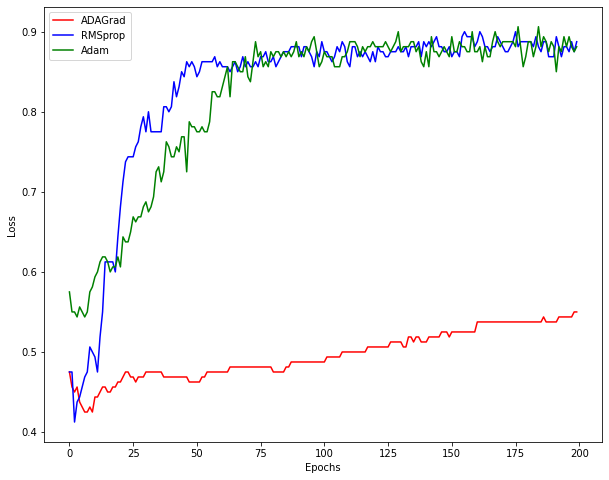

In [52]:
# Difference in accuracy when we use different optimizers

plt.figure(figsize=(10,8))
plt.plot(logs_with_adagrad.history['val_accuracy'], color='red',label='ADAGrad')
plt.plot(logs_with_RMSprop.history['val_accuracy'], color='blue',label='RMSprop')
plt.plot(logs_with_Adam.history['val_accuracy'], color='green',label='Adam')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

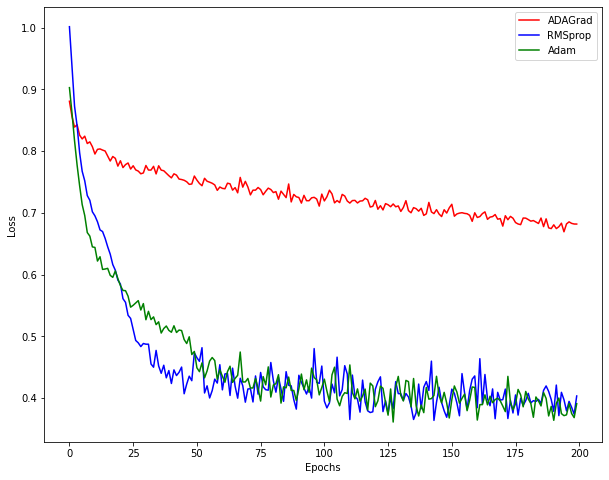

In [51]:
# Difference in loss when we use different optimizers
plt.figure(figsize=(10,8))
plt.plot(logs_with_adagrad.history['loss'], color='red',label='ADAGrad')
plt.plot(logs_with_RMSprop.history['loss'], color='blue',label='RMSprop')
plt.plot(logs_with_Adam.history['loss'], color='green',label='Adam')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()